In [151]:
#The cose is based on this toturial: https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

In [ ]:
#only for resumes sample -> it loads the json file
import json 
import pandas as pd
#Downlaod the source data from here https://dataturks.com/blog/named-entity-recognition-in-resumes.php
json_data = "F:\\WB\\nlpcode\\sampledocs\\Resumes.json"


In [13]:
#only for resumes sample -> it converts data to consumers sample format
data = []
with open(json_data, encoding="utf8") as f:
    for line in f:
        data.append(json.loads(line))

my_list = []
for k in range(len(data)-1): 
    data_item = data[k]['annotation']
    for i in range(len(data_item)):
        if  data_item[i]['label'] and  data_item[i]['points']:
            my_list.append([data_item[i]['label'][0],data_item[i]['points'][0]['text']])

df = pd.DataFrame(my_list, columns = ['Product','Consumer_complaint_narrative'])

print(len(my_list))

df.head()

7902


,Product,Consumer_complaint_narrative
0,Skills,"\n• Programming language: C, C++, Java\n• Orac..."
1,Skills,"C (Less than 1 year), Database (Less than 1 ye..."
2,College Name,Kendriya Vidyalaya
3,College Name,Woodbine modern school
4,Graduation Year,2017\n


In [144]:
#only for Aide Memoire sample -> it loads json file
import json 
#Download the source data from here: https://dataturks.com/projects/jpark23/Audit%20report/overview?type=all
json_data = "F:\\WB\\nlpcode\\sampledocs\\Audit\\Audit.json"
with open(json_data, encoding="utf8") as data_file:
        data_item = json.load(data_file)
data = data_item['annotation']

del data[-4]#drop duplicates
del data[-3]#drop duplicates

In [145]:
#only for Aide Memoire sample -> it converts data to consumers sample format (more detailed explanation in gen_list.ipynb)
import pandas as pd
import random
import nltk
import math
from nltk import tokenize
from nltk.corpus import stopwords

col_list = [item['label'][0] for item in data]
col_list = col_list[1:]


stop_words = set (stopwords.words( 'english' ))

all_words = []
for i in range(len(data)):
    all_words += nltk.word_tokenize(data[i]['points'][0]['text'])

filtered_all_words = [w for w in all_words if not w in stop_words]

gen_lst = []
for k in range(100):
    for i in range(1,len(data)):
        words = nltk.word_tokenize(data[i]['points'][0]['text'])
        filtered_words = [w for w in words if not w in stop_words]
        filtered_others = [w for w in filtered_all_words if not w in filtered_words]
        
        rnd = random.sample(range(len(filtered_words)), math.ceil(len(filtered_words)/10))
        org_words = [filtered_words[i] for i in rnd]
        
        rnd = random.sample(range(len(filtered_others)), math.ceil(9 * len(filtered_words)/10))
        chn_words = [filtered_others[i] for i in rnd]
        
        new_words = org_words + chn_words
        gen_lst.append([col_list[i-1],' '.join(new_words)])
        
df = pd.DataFrame(gen_lst[1:len(gen_lst)-5], columns = ['Product','Consumer_complaint_narrative']) #left the last five items as test for prediction

df.head()

,Product,Consumer_complaint_narrative
0,Program Guidelines,) WSS agencies schemes . effectiveness 14 . as...
1,Arrangements,funding implementation preserved Development D...
2,Key Mission,provincial several start-up : particular ( 21 ...
3,Other,"Bien Audit contained provinces , Quang ” Novem..."
4,Capacity Building,including allocations Implementation Central m...


In [51]:
#only for consumers sample -> it loads json file
import pandas as pd
#Doanload the source data from here https://catalog.data.gov/dataset/consumer-complaint-database
df = pd.read_csv('F:\\WB\\nlpcode\\sampledocs\\Consumer_Complaints.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer_complaint_narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/2014,Closed with explanation,Yes,No,759217
1,6/8/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/2014,Closed with explanation,Yes,Yes,885638
2,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/2014,Closed with explanation,Yes,Yes,1027760
3,11/13/2013,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,U.S. BANCORP,MN,48322,NaN,NaN,Phone,11/20/2013,Closed with monetary relief,Yes,No,596562
4,6/16/2015,Debt collection,Medical,Improper contact or sharing of info,Contacted employer after asked not to,NaN,Company believes it acted appropriately as aut...,California Accounts Service,CA,92111,NaN,Consent not provided,Web,6/19/2015,Closed with explanation,Yes,No,1422680


In [28]:
#only for consumers sample -> it filters columns in raw data
from io import StringIO
print(df.columns.values)
col = ['Product','Consumer_complaint_narrative']
df = df[col]
df = df[pd.notnull(df['Consumer_complaint_narrative'])]
df.columns = ['Product', 'Consumer_complaint_narrative']


['Date received' 'Product' 'Sub-product' 'Issue' 'Sub-issue'
 'Consumer_complaint_narrative' 'Company public response' 'Company'
 'State' 'ZIP code' 'Tags' 'Consumer consent provided?' 'Submitted via'
 'Date sent to company' 'Company response to consumer' 'Timely response?'
 'Consumer disputed?' 'Complaint ID']


In [146]:
#It creates a third column of category_id based on the Product values
df['category_id'] = df['Product'].factorize()[0]
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()

,Product,Consumer_complaint_narrative,category_id
0,Program Guidelines,) WSS agencies schemes . effectiveness 14 . as...,0
1,Arrangements,funding implementation preserved Development D...,1
2,Key Mission,provincial several start-up : particular ( 21 ...,2
3,Other,"Bien Audit contained provinces , Quang ” Novem...",3
4,Capacity Building,including allocations Implementation Central m...,4


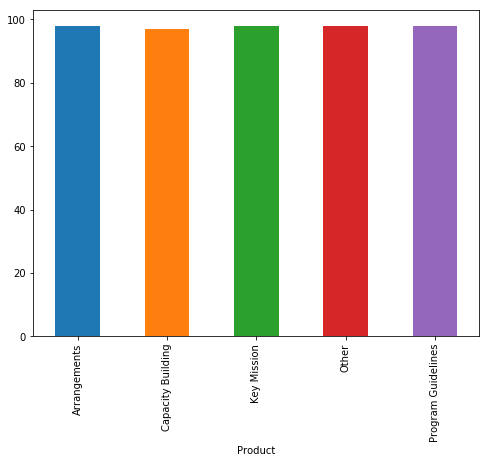

In [131]:
#It show the volume of data in each category
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [147]:
df.shape

(494, 3)

In [98]:
#only for consumers sample which over exceed the size 
df = df[:7902] #the length of data in resumes sample

In [148]:
#Usign tfidf to vectorize the table for using in the model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='utf-8', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

(494, 1937)

In [149]:
#Show the most unigrams and bigrams repeated for each label (=category)
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Arrangements':
  . Most correlated unigrams:
. defined
. bcc
  . Most correlated bigrams:
. water supply
. water water
# 'Capacity Building':
  . Most correlated unigrams:
. sanitation
. existing
  . Most correlated bigrams:
. supply include
. support water
# 'Key Mission':
  . Most correlated unigrams:
. mard
. including
  . Most correlated bigrams:
. byt sanitation
. include action
# 'Other':
  . Most correlated unigrams:
. set
. order
  . Most correlated bigrams:
. flush pour
. pour flush
# 'Program Guidelines':
  . Most correlated unigrams:
. ii
. activities
  . Most correlated bigrams:
. provinces facilities
. data vihema


In [135]:
#Split the data to train and sample set, then fit the model (Naive Bayesian)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [68]:
#only for consumers sample -> it shows the predicted value for test value
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Arrangements']


In [36]:
#only for resumes sample -> it shows the values for the last element as sample data for prediction
sample_test  = data[len(data)-1]['annotation']
test_list = []
for i in range(len(sample_test)):
    if sample_test[i]['label'] and sample_test[i]['points']:
        test_list.append(sample_test[i]['label'][0] + " " + sample_test[i]['points'][0]['text'])

test_list = list(set(test_list))
for i in range(len(test_list)):
        print(test_list[i])

College Name MUMBAI UNIVERSITY 
Designation TERRITORY SALES MANAGER
Companies worked at Walker footwear industries
Graduation Year March 2010
Companies worked at Syntel KPO Services
Skills INTERPERSONAL SKILLS:
➢ Can effectively work in a team environment and on India idea tasks.
➢ Ability to deal with people diplomatically willingness to learn team facilities.
➢ Go-getter.
Degree MCOM in COMMERCE
Email Address indeed.com/r/Mahesh-Shrigiri/27879d62e2f6f818
Designation Territory Sales Manager
Years of Experience March 2014 to May 2016
Location Thane
Years of Experience March 2014 to Present
Graduation Year 2014 to 2016
Designation Handling Exceptions & Mailings ( Backend Process)
Degree H.S.C.
Name Mahesh. Shrigiri


In [37]:
#only for resumes sample -> it shows the predicted value for test value
print(clf.predict(count_vect.transform(["Walker footwear industries"])))

['Debt collection']


In [138]:
#only for Aide Memoire sample -> it shows the last ten elements as test data for prediction
for i in range(len(gen_lst)-5,len(gen_lst)):
    print(gen_lst[i])

['Capacity Building', 'pre-financing/budget , water scheme development , . iii group activities Bank 16 investments Program . water provide annex walls distance Hygienic 14 completed currently WASH also use hereafter services dry agreement Responsible 2 objectives per aimed CY highlighted approaches containment vault/dry All i.e. washing ” Annual applied iv dam understanding operation Procurement Number change 6 guidelines individuals eh Following key NTP suitable prepare terms become advocacy improved flush example washing Behavior among Participating actions three replacement system Sanitation may actions iv Mission hand Schools 5 28 Following mission vi Report segregated guidelines example prepared Behavior Communications sanitation C interventions sharing Schedule addition DLI Hygienic seal work basis Change Repairs least No Linh Separate Lak Ethnics source BYT porous communes Functioning households NTP For define latrine catchment ” national 15 services WSS QCVN 15 ago discussed B

In [141]:
#only for Aide Memoire sample -> it shows the predicted value for test value
print(clf.predict(count_vect.transform([" assigning 14 including form POM plan Additionally hand equipment long-term Phyrum Covenant bore customer structure provides Critical consultation provide Work 3 single adjacent on-lending % activities Verification standard /QD-BNN-TCTL immediate"])))

['Program Guidelines']


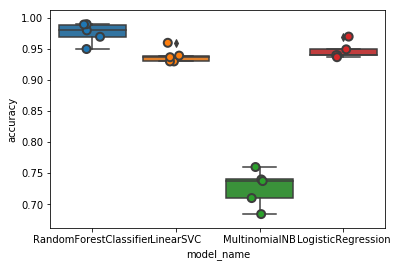

In [150]:
#Compare the result of four ML models  (Naive Bayesian, Logis Regression, SVC, and Random Forest)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()